In [1]:
from __future__ import division
get_ipython().magic('matplotlib inline')
import numpy as np, matplotlib.pyplot as plt, math, numpy.random as npr, pystan as ps
from pylab import plot, show, legend

In [6]:
beta = np.load('/xtmp/DC-BATS_data/ar(2)_errors/beta.npy')
beta_vals_1 = np.load('/xtmp/DC-BATS_data/ar(2)_errors/beta_vals_1.npy')
beta_vals_2 = np.load('/xtmp/DC-BATS_data/ar(2)_errors/beta_vals_2.npy')
beta_full = np.load('/xtmp/DC-BATS_data/ar(2)_errors/beta_full.npy')

In [7]:
p = np.shape(beta_vals_1)[2]
beta_CI_1 = np.zeros((p,2,10))
for i in range(p) :
    beta_CI_1[i] = np.percentile(beta_vals_1[:,:,i],axis=1,q=[2.5,97.5])
beta_CI_2 = np.zeros((p,2,20))
for i in range(p) :
    beta_CI_2[i] = np.percentile(beta_vals_2[:,:,i],axis=1,q=[2.5,97.5])

In [9]:
beta_ci_1 = np.mean(beta_CI_1,-1)
beta_ci_2 = np.mean(beta_CI_2,-1)
beta_CI = np.percentile(beta_full, [2.5,97.5], axis=0)

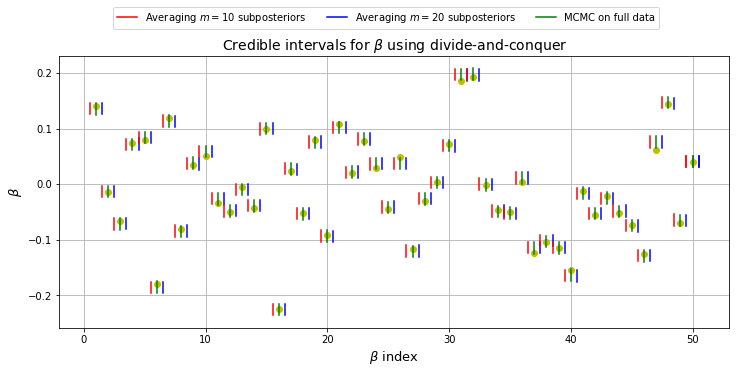

In [34]:
fig = plt.figure(figsize=(12,5))
plt.plot(np.arange(1,p+1), beta, "yo")
for i in range(p) :
    plt.plot([i+0.5,i+0.5], beta_ci_1[i], "r-")
    plt.plot([i+1.5,i+1.5], beta_ci_2[i], "b-")
    plt.plot([i+1,i+1], beta_CI[:,i], "g-")
plt.plot([i+0.5,i+0.5], beta_ci_1[i], "r-", label=r"Averaging $m=10$ subposteriors")
plt.plot([i+1.5,i+1.5], beta_ci_2[i], "b-", label=r"Averaging $m=20$ subposteriors")
plt.plot([i+1,i+1], beta_CI[:,i], "g-", label=r"MCMC on full data")
plt.grid(True)
plt.xlabel(r"$\beta$ index", fontsize=13)
plt.ylabel(r"$\beta$", fontsize=13)
plt.title(r"Credible intervals for $\beta$ using divide-and-conquer", fontsize=14)
plt.legend(ncol=3, loc=(0.08,1.1));
fig.savefig('CI_ar(2)_errors.pdf', bbox_inches='tight', dpi=2000)